In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

%matplotlib inline

## (a) Construya un dataframe con los datos a analizar descargando los datos desde la URL adjunta.

In [30]:
df = pd.read_csv("kc_house_data.csv",sep=",", header=0)
df = df.drop(['id','date','zipcode'], axis=1)

## (b) Describa brevemente el dataset utilizar.

In [31]:
df.shape

(21613, 18)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


In [33]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


## (c) Normalice los datos antes de trabajar. Explique la importancia/conveniencia de realizar esta operacion.

In [34]:
X = df
y = np.log(df['price'])
mask = np.zeros(len(X))
limit = int(len(X)*0.7)
mask[:limit] = 1
istrain = (mask== 1)
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
Xtrain = Xtrain.drop(['price'], axis=1)
Xtest = Xtest.drop(['price'], axis=1)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(Xtrain)
df_scaled_train = pd.DataFrame(scaler.transform(Xtrain), columns=Xtrain.columns)
df_scaled_train.insert(df_scaled_train.shape[1], 'intercept', np.ones(df_scaled_train.shape[0]))

## (d) Realice una regresion lineal de mınimos cuadrados basica. Explique los argumentos que se deben entregar a la funcion que implementa la regresion lineal.

In [82]:
import sklearn.linear_model as lm
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(df_scaled_train, ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

## (e) Construya una tabla con los pesos y Z-score correspondientes a cada predictor (variable). ¿Observa algun problema? Si es ası, comente y proponga un metodo para eliminar dicho problema.

In [133]:
def calculate_z(lm,X,y):
    coefs =linreg.coef_[:-1]
    var = np.sum((lm.predict(X)-y)**2)/(len(X) - len(coefs) - 1)
    X = X.drop(["intercept"], axis=1)
    xtx = np.dot(X.T,X)
    diag = np.diag(np.linalg.inv(xtx))
    z = coefs/(np.sqrt(var)*np.sqrt(diag))
    df = pd.DataFrame({"names":X.columns,"coefs":coefs,"z-score":z})
    return df

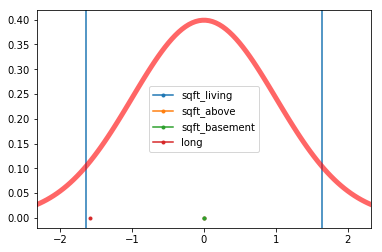

In [135]:
from scipy.stats import t
fig, ax = plt.subplots(1, 1)
df = len(df_scaled_train) - len(linreg.coef_[::-1] -1)
x = np.linspace(t.ppf(0.01, df), t.ppf(0.99, df), 100)
ax.set_xlim((t.ppf(0.01, df), t.ppf(0.99, df)))
ax.axvline(t.ppf(0.05, df))
ax.axvline(t.ppf(0.95, df))
ax.plot(x, t.pdf(x, df),'r-', lw=5, alpha=0.6)
for i,point in enumerate(z_scores["z-score"]):
    if point < 2 and point > -2:
        ax.plot([point], [0], marker='o', markersize=3, label=df_scaled_train.columns[i])
ax.legend()

In [136]:
z_scores = calculate_z(linreg,df_scaled_train,ytrain)

In [137]:
z_scores

,coefs,names,z-score
0,-0.008086,bedrooms,-3.034180e+00
1,0.055111,bathrooms,1.465651e+01
2,0.056935,sqft_living,7.530827e-07
3,0.022873,sqft_lot,7.597741e+00
4,0.035505,floors,1.227029e+01
5,0.033366,waterfront,1.478618e+01
6,0.042595,view,1.739128e+01
7,0.046360,condition,2.053749e+01
8,0.184577,grade,4.806978e+01
9,0.045937,sqft_above,6.824477e-07


$sqft\_above, sqft\_basement, sqft\_living \approx 0$

## (f) Estime el error de prediccion del modelo usando validacion cruzada con un numero de “folds” igual a K = 5 y K = 10. Recuerde que para que la estimacion sea razonable debe ajustar los pesos del modelo de nuevo, cada vez que trabaja sobre un determinado “fold”. Mida el error real del modelo sobre el conjunto de pruebas, compare y concluya.

In [39]:
x_test = pd.DataFrame(scaler.transform(Xtest),columns=Xtest.columns)
x_test.insert(x_test.shape[1], 'intercept', np.ones(x_test.shape[0]))
yhat_test = linreg.predict(x_test)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
mse_test

0.06525925123726196

In [40]:
from sklearn.model_selection import KFold
def k_fold_cv(X,y,n_fold=5):
    X = X.as_matrix()
    y = y.as_matrix()
    kf = KFold(n_splits=n_fold)
    mse_cv = 0
    for train,val in kf.split(X):
        cross_scaler = StandardScaler().fit(X[train])
        df_cross_train = pd.DataFrame(cross_scaler.transform(X[train]))
        df_cross_train.insert(df_cross_train.shape[1],'intercept', np.ones(df_cross_train.shape[0]))
        linreg = lm.LinearRegression(fit_intercept= False )
        linreg.fit(df_cross_train,y[train])
        df_cross_test = pd.DataFrame(cross_scaler.transform(X[val]))
        df_cross_test.insert(df_cross_test.shape[1], 'intercept', np.ones(df_cross_test.shape[0]))
        yhat_val = linreg.predict(df_cross_test)
        mse_fold = np.mean(np.power(yhat_val - y[val], 2))
        mse_cv += mse_fold
    return mse_cv /n_fold 

In [41]:
print(k_fold_cv(Xtrain,ytrain,n_fold=5))
print(k_fold_cv(Xtrain,ytrain,n_fold=10))

0.064701633522
0.0646829054256


## (j) Mida los errores de prediccion para cada dato de entrenamiento. Utilizando un “quantile-quantile plot” determine si es razonable la hipotesis de normalidad sobre los residuos del modelo

 $y = X^T \beta + \epsilon$, $\epsilon \sim N(0, \sigma^2)$

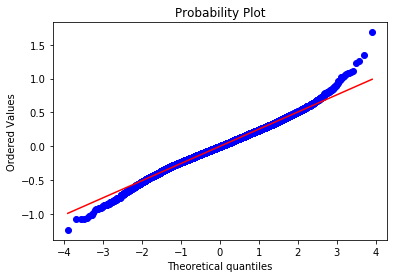

In [42]:
import scipy.stats as stats

y_hat_train = linreg.predict(df_scaled_train)
error = y_hat_train-ytrain
_ = stats.probplot(error, dist="norm", plot=plt)

## (h) Se generan dos muestreos de datos donde el valor de sus etiqueta siguen distribuciones distintas: Genere dos modelos, evalue y compare sus comportamientos

In [43]:
df_A = df.sample(3000)
frames = []
valor = np.log(df.price)
for z in np.arange(int(np.min(valor)),int(np.max(valor))+1,0.5):
    frames.append(df[(np.log(df.price) >= z) & (np.log(df.price) < z+0.5)].head(500))
df_B = pd.concat(frames).sample(3000)
X_A = df_A.iloc[:,1:].values
y_A = df_A.price
X_B = df_B.iloc[:,1:].values
y_B = df_B.price
from sklearn.model_selection import train_test_split
Xtrain_A, Xval_A, ytrain_A, yval_A = train_test_split(X_A, y_A, test_size=0.3, random_state=42)
Xtrain_B, Xval_B, ytrain_B, yval_B = train_test_split(X_B, y_B, test_size=0.3, random_state=42)

In [44]:
linreg_A = lm.LinearRegression(fit_intercept=False)
linreg_B = lm.LinearRegression(fit_intercept=False)
linreg_A.fit(Xtrain_A,ytrain_A)
linreg_B.fit(Xtrain_B,ytrain_B)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [45]:
yhat_A = linreg_A.predict(Xval_A)
yhat_B = linreg_B.predict(Xval_B)

resid_A = yval_A - yhat_A
resid_B = yval_B - yhat_B

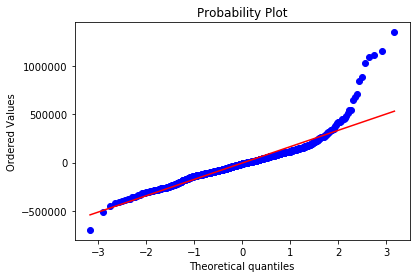

In [46]:
_ = stats.probplot(resid_A, dist="norm", plot=plt)

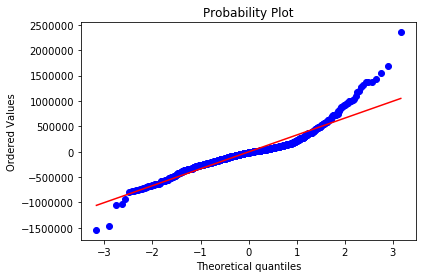

In [47]:
_ = stats.probplot(resid_B, dist="norm", plot=plt)

In [48]:
print("A:")
print("Train:")
print(metrics.mean_squared_error(linreg_A.predict(Xtrain_A),ytrain_A))
print("Test:")
print(metrics.mean_squared_error(yval_A,yhat_A))
print("B:")
print("Train:")
print(metrics.mean_squared_error(linreg_B.predict(Xtrain_B),ytrain_B))
print("Test:")
print(metrics.mean_squared_error(yval_B,yhat_B))

A:
Train:
43220092999.0
Test:
32804462447.5
B:
Train:
109802846733.0
Test:
121667564689.0


# Seleccion de Atributos
## (a) Construya una funcion que implemente Forward Step-wise Selection (FSS). Es decir, partiendo con un modelo sin predictores (variables), agregue un predictor a la vez, re-ajustando el modelo de regresion en cada paso. Para seleccionar localmente una variable, proponga/implemente un criterio distinto al utilizado en el codigo de ejemplo. Construya un grafico que muestre el error de entrenamiento y el error de pruebas como funci´on del n´umero de variables en el modelo. Ordene el eje x de menor a mayor. 
(Ver que otro criterio usar)

In [72]:
def fss(x, y, names_x, k = 10000, if use_cor= False):
    p = x.shape[1]-1

    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))

    #Cómo seleccionar el primero
    selected = [p]
    
    if use_cor:
        best_cor = 0
        for i in range(p):
            x[:,i] = np.corrcoef()
    
    current_score = 0.0
    best_new_score = 0.0
    
    mses = []
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
            score_candidates.sort()
            score_candidates[:] = score_candidates[::-1]
            best_new_score, best_candidate = score_candidates.pop()
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            print("selected = %s ..."%names_x[best_candidate])
            print("totalvars=%d, mse = %f"%(len(indexes),best_new_score))
    
    return selected
'''Revise si la cantidad de etiquetas concuerda con la cantidad de variables que esta utilizando,
 puede que tenga que eliminar un elemento de la lista name_regressors'''

names_regressors = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view",
"condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat-long",
 "sqft_living15","sqft_lot15","intercept"]

Xm = df_scaled_train.as_matrix()
Ym = ytrain.as_matrix()

regressors = fss(Xm,Ym,names_regressors)
regressors

selected = bedrooms ...
totalvars=2, mse = 0.244675
selected = sqft_living ...
totalvars=3, mse = 0.144658
selected = floors ...
totalvars=4, mse = 0.143699
selected = view ...
totalvars=5, mse = 0.137470
selected = grade ...
totalvars=6, mse = 0.121706
selected = sqft_basement ...
totalvars=7, mse = 0.120197
selected = yr_renovated ...
totalvars=8, mse = 0.118646
selected = sqft_living15 ...
totalvars=9, mse = 0.116378
selected = intercept ...
totalvars=10, mse = 0.116372
selected = bathrooms ...
totalvars=11, mse = 0.116332
selected = waterfront ...
totalvars=12, mse = 0.115665
selected = sqft_above ...
totalvars=13, mse = 0.115665
selected = lat-long ...
totalvars=14, mse = 0.076263
selected = sqft_lot ...
totalvars=15, mse = 0.076021
selected = yr_built ...
totalvars=16, mse = 0.068604
selected = condition ...
totalvars=17, mse = 0.066888
selected = sqft_lot15 ...
totalvars=18, mse = 0.064516


[17, 0, 2, 4, 6, 8, 10, 12, 14, 16, 1, 5, 9, 13, 3, 11, 7, 15]

In [70]:
X = df_scaled_train.as_matrix()
y = ytrain.as_matrix()
Xtest = x_test.as_matrix()
indexes = []
train_mses = []
test_mses = []
for reg in regressors:
    indexes.append(reg)
    Xtmp = X[:,indexes]
    linreg = lm.LinearRegression(fit_intercept=False)
    yhat = linreg.fit(Xtmp,ytrain).predict(Xtmp)
    train_mse = metrics.mean_squared_error(y,yhat)
    
    XtestTmp = Xtest[:,indexes]
    yhat_test = linreg.predict(Xtest[:,indexes])
    test_mse = metrics.mean_squared_error(yhat_test,ytest)
    train_mses.append(train_mse)
    test_mses.append(test_mse)

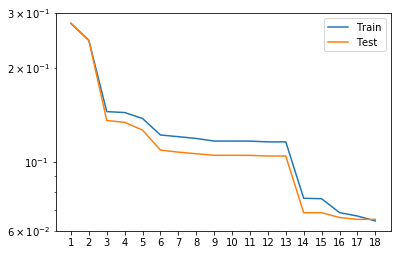

In [71]:
#plot de errores
x_ax = list(range(1, len(regressors)+1))
plt.semilogy(x_ax,train_mses,label="Train")
plt.semilogy(x_ax,test_mses, label="Test")
plt.xticks(x_ax)
plt.legend()
plt.show()

#  Regularizacion
## Ajuste un modelo lineal utilizando “Ridge Regression”, es decir, regularizando con la norma $l_2$. Utilice valores del parametro de regularizacion $\lambda$ en el rango $[10^4, 10^{−1}]$. Construya un grafico que muestre los coeficientes obtenidos como funcion del parametro de regularizacion. Describa lo que observa. 
(Hint: Note que la lınea 4 y el primer argumento en la lınea 12 son crıticos).

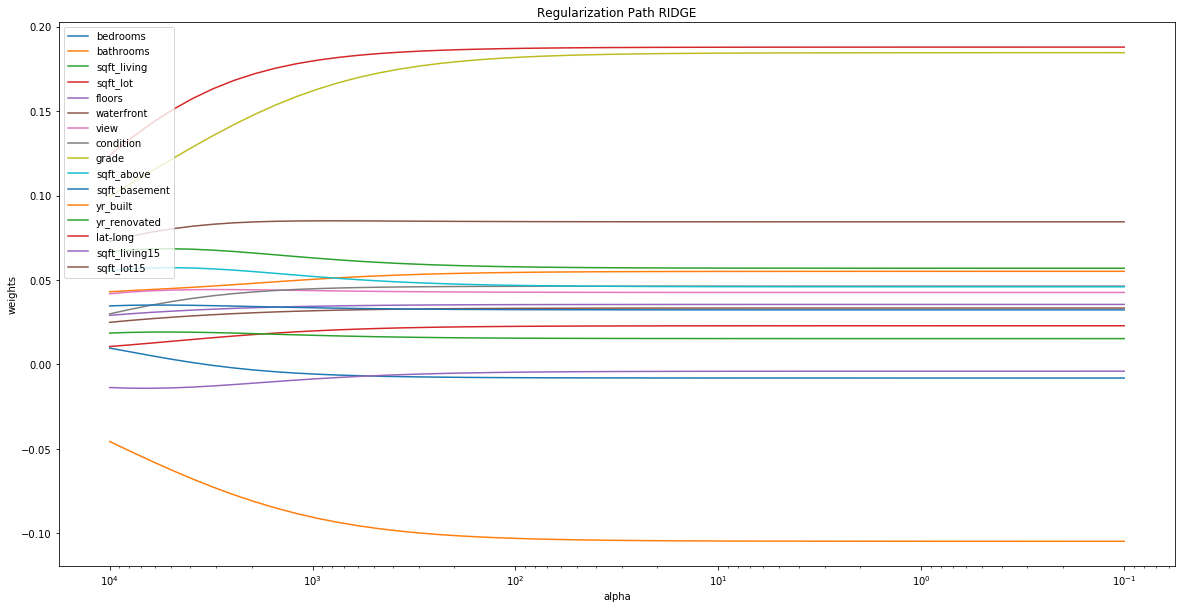

In [52]:
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt
Dtrain = df_scaled_train.copy()
Dtrain = Dtrain.drop('intercept', axis=1)
names_regressors = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view",
"condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat-long",
"sqft_living15","sqft_lot15"]
alphas_ = np.logspace(4,-1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Dtrain, ytrain)
    coefs.append(model.coef_)

fig = plt.figure(figsize=(20,10))
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
#     print(alphas_.shape)
#     print(y_arr.shape)
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Regularization Path RIDGE')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

##  Ajuste un modelo lineal utilizando el metodo “Lasso”, es decir, regularizando con la norma $l_1$. Utilice valores del parametro de regularizacion $\lambda$ en el rango $[10^1, 10^{−2}]$.  Para obtener el codigo, modifique las lineas 7 y 9 del ejemplo anterior. Construya un grafico que muestre los coeficientes obtenidos como funcion del parametro de regularizacion. Describa lo que observa. ¿Es mas efectivo Lasso para seleccionar atributos?

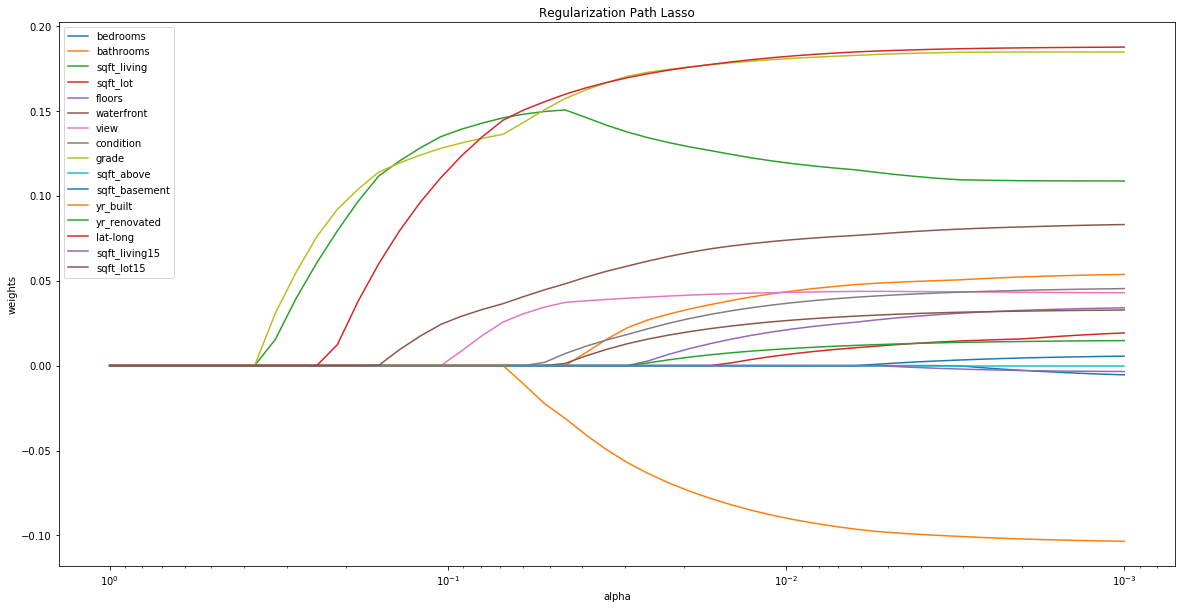

In [53]:
from sklearn.linear_model import Lasso
import matplotlib.pylab as plt
Dtrain = df_scaled_train.copy()
Dtrain = Dtrain.drop('intercept', axis=1)
names_regressors = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view",
"condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat-long",
"sqft_living15","sqft_lot15"]
alphas_ = np.logspace(0,-3,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Dtrain, ytrain)
    coefs.append(model.coef_)

fig = plt.figure(figsize=(20,10))
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
#     print(alphas_.shape)
#     print(y_arr.shape)
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Regularization Path Lasso')
plt.axis('tight')
plt.legend(loc=2)
plt.show()


## (c) Utilizando “Ridge Regression”, construya un grafico que muestre el error de entrenamiento y el error de pruebas como funcion del parametro de regularizacion. Discuta lo que observa

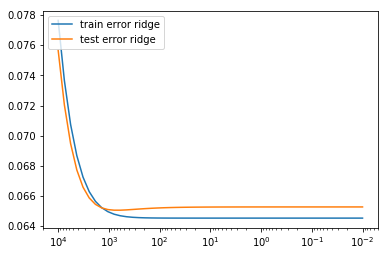

In [54]:
Xtest = x_test.copy()
ytest = ytest.copy()
Xtest = Xtest.drop('intercept', axis=1)
alphas_ = np.logspace(4,-2,base=10)
coefs = []
model = Ridge(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Dtrain, ytrain)
    yhat_train = model.predict(Dtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend(loc=2)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

## (d) Utilizando “Lasso”, construya un grafico que muestre el error de entrenamiento y el error de pruebas como funcion del parametro de regularizaci´on. Discuta lo que observa.

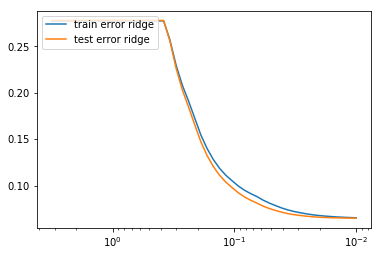

In [55]:
Xtest = x_test.copy()
ytest = ytest.copy()
Xtest = Xtest.drop('intercept', axis=1)
alphas_ = np.logspace(0.5,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Dtrain, ytrain)
    yhat_train = model.predict(Dtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend(loc=2)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

## (e) Estime el valor del parametro de regularizacion en los metodos anteriores usando validacion cruzada.

In [56]:
from sklearn.linear_model import Ridge
MSE = lambda y,yhat: np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn import cross_validation
k_fold = cross_validation.KFold(len(Xm),10)
best_cv_mse = float("inf")
alphas_ = np.logspace(4,-2,base=10)
model = Ridge(fit_intercept=True)
mse_list_k10 = []
for a in alphas_:
    model.set_params(alpha=a)
    for train,vald in k_fold:
        cross_scaler = StandardScaler().fit(Xm[train])
        df_cross_train = pd.DataFrame(cross_scaler.transform(Xm[train]),
        columns=Xtrain.columns)
        df_cross_train.insert(df_cross_train.shape[1], 'intercept',
        np.ones(df_cross_train.shape[0]))
        df_cross_test = pd.DataFrame(cross_scaler.transform(Xm[vald]),
        columns=Xtrain.columns)
        df_cross_test.insert(df_cross_test.shape[1], 'intercept',
        np.ones(df_cross_test.shape[0]))
        mse_list_k10.append(MSE(model.fit(df_cross_train,
        ym[train]).predict(df_cross_test),ym[vald]))
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
        print("BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse))

/home/tronco/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


BEST PARAMETER=10000.000000, MSE(CV)=0.079556
BEST PARAMETER=7543.120063, MSE(CV)=0.077331
BEST PARAMETER=5689.866029, MSE(CV)=0.075493
BEST PARAMETER=4291.934260, MSE(CV)=0.073986
BEST PARAMETER=3237.457543, MSE(CV)=0.072754
BEST PARAMETER=2442.053095, MSE(CV)=0.071746
BEST PARAMETER=1842.069969, MSE(CV)=0.070920
BEST PARAMETER=1389.495494, MSE(CV)=0.070240
BEST PARAMETER=1048.113134, MSE(CV)=0.069677
BEST PARAMETER=790.604321, MSE(CV)=0.069207
BEST PARAMETER=596.362332, MSE(CV)=0.068811
BEST PARAMETER=449.843267, MSE(CV)=0.068475
BEST PARAMETER=339.322177, MSE(CV)=0.068188
BEST PARAMETER=255.954792, MSE(CV)=0.067940
BEST PARAMETER=193.069773, MSE(CV)=0.067724
BEST PARAMETER=145.634848, MSE(CV)=0.067534
BEST PARAMETER=109.854114, MSE(CV)=0.067366
BEST PARAMETER=82.864277, MSE(CV)=0.067217
BEST PARAMETER=62.505519, MSE(CV)=0.067084
BEST PARAMETER=47.148664, MSE(CV)=0.066964
BEST PARAMETER=35.564803, MSE(CV)=0.066855
BEST PARAMETER=26.826958, MSE(CV)=0.066757
BEST PARAMETER=20.235896, M

In [293]:
from sklearn.linear_model import Lasso
MSE = lambda y,yhat: np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn import cross_validation
k_fold = cross_validation.KFold(len(Xm),10)
best_cv_mse = float("inf")
alphas_ = np.logspace(0.5,-2,base=10)
model = Lasso(fit_intercept=True)
mse_list_k10 = []
for a in alphas_:
    model.set_params(alpha=a)
    for train,vald in k_fold:
        cross_scaler = StandardScaler().fit(Xm[train])
        df_cross_train = pd.DataFrame(cross_scaler.transform(Xm[train]),
        columns=Xtrain.columns)
        df_cross_train.insert(df_cross_train.shape[1], 'intercept',
        np.ones(df_cross_train.shape[0]))
        df_cross_test = pd.DataFrame(cross_scaler.transform(Xm[vald]),
        columns=Xtrain.columns)
        df_cross_test.insert(df_cross_test.shape[1], 'intercept',
        np.ones(df_cross_test.shape[0]))
        mse_list_k10.append(MSE(model.fit(df_cross_train,
        ym[train]).predict(df_cross_test),ym[vald]))
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
        print("BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse))

BEST PARAMETER=3.162278, MSE(CV)=0.277498
BEST PARAMETER=1.976598, MSE(CV)=0.277498
BEST PARAMETER=0.339322, MSE(CV)=0.276496
BEST PARAMETER=0.301711, MSE(CV)=0.274288
BEST PARAMETER=0.268270, MSE(CV)=0.271299
BEST PARAMETER=0.238534, MSE(CV)=0.267827
BEST PARAMETER=0.212095, MSE(CV)=0.263880
BEST PARAMETER=0.188586, MSE(CV)=0.259511
BEST PARAMETER=0.167683, MSE(CV)=0.254916
BEST PARAMETER=0.149097, MSE(CV)=0.250227
BEST PARAMETER=0.132571, MSE(CV)=0.245535
BEST PARAMETER=0.117877, MSE(CV)=0.240909
BEST PARAMETER=0.104811, MSE(CV)=0.236395
BEST PARAMETER=0.093194, MSE(CV)=0.231992
BEST PARAMETER=0.082864, MSE(CV)=0.227719
BEST PARAMETER=0.073680, MSE(CV)=0.223595
BEST PARAMETER=0.065513, MSE(CV)=0.219619
BEST PARAMETER=0.058251, MSE(CV)=0.215761
BEST PARAMETER=0.051795, MSE(CV)=0.212029
BEST PARAMETER=0.046054, MSE(CV)=0.208425
BEST PARAMETER=0.040949, MSE(CV)=0.204945
BEST PARAMETER=0.036410, MSE(CV)=0.201587
BEST PARAMETER=0.032375, MSE(CV)=0.198355
BEST PARAMETER=0.028786, MSE(CV)=0

# Predicción de Utilidades de Pelı́culas

In [58]:
# !wget http://www.inf.utfsm.cl/~cvalle/movies.tar.gz;tar -xzvf movies.tar.gz;rm movies.tar.gz

In [247]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix,vstack
from scipy.io import mmread
set_path = "movies-preproc/ngrams-deprels-fp1-origin.runtime.budget.numscreen.ratings.seasons.stars/"
X_test = csr_matrix(mmread(set_path+'test.x.mm'))
y_test = np.loadtxt(set_path+'test.y.dat')

X_train = csr_matrix(mmread(set_path+'train.x.mm'))
y_train = np.loadtxt(set_path+'train.y.dat')

X_val = csr_matrix(mmread(set_path+'dev.x.mm'))
y_val = np.loadtxt(set_path+'dev.y.dat')

In [248]:
import sklearn.linear_model as lm
model = lm.LinearRegression(fit_intercept = False)
model.fit(vstack((X_train,X_val)),np.hstack((y_train,y_val)))
print("train: R^2=%f"%model.score(X_test, y_test))

train: R^2=0.594850


In [288]:
alphas_ = np.logspace(4,-1,base=10, num=10)
model = lm.Ridge()
scores = np.empty_like(alphas_)
test_scores =  np.empty_like(alphas_)
for i,alpha in enumerate(alphas_):
    model.set_params(alpha=alpha)
    model.fit(X_train,y_train)
    scores[i] = model.score(X_val,y_val)
    test_scores[i] = model.score(X_test,y_test)
pd.DataFrame({"alpha":alphas_,"scores":scores, "test_score": test_scores})

,alpha,scores,test_score
0,10000.000000,0.555559,0.508592
1,2782.559402,0.560386,0.513206
2,774.263683,0.561800,0.514668
3,215.443469,0.562269,0.515028
4,59.948425,0.562364,0.515184
5,16.681005,0.562482,0.515272
6,4.641589,0.562456,0.515290
7,1.291550,0.562518,0.515287
8,0.359381,0.562600,0.515308
9,0.100000,0.562346,0.515170


In [251]:
import sklearn.decomposition as decomp
import sklearn.preprocessing as preproc

In [252]:
svd = decomp.TruncatedSVD(n_components=200)

In [253]:
stder = preproc.StandardScaler()

In [254]:
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)
X_val_svd = svd.transform(X_val)

In [255]:
X_train_preproc = stder.fit_transform(X_train_svd)
X_test_preproc = stder.transform(X_test_svd)
X_val_preproc = stder.transform(X_val_svd)

In [264]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
y_val_log = np.log(y_val)

In [265]:
linreg = lm.LinearRegression()
linreg.fit(X_train_preproc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [266]:
y_approx = linreg.predict(X_test_preproc)

In [267]:
metrics.r2_score(y_test,y_approx)

0.59628290779346826

In [287]:
alphas_ = np.logspace(4,-10,base=10, num=50)
model = lm.Ridge()
scores = np.empty_like(alphas_)
test_scores =  np.empty_like(alphas_)
for i,alpha in enumerate(alphas_):
    model.set_params(alpha=alpha)
    model.fit(X_train_preproc,y_train_log)
    scores[i] = model.score(X_val_preproc,y_val_log)
    test_scores[i] = model.score(X_test_preproc,y_test_log)
results = pd.DataFrame({"alpha":alphas_,"scores":scores, "test_scores": test_scores})
results

,alpha,scores,test_scores
0,1.000000e+04,0.203513,0.207287
1,5.179475e+03,0.345391,0.358564
2,2.682696e+03,0.507716,0.529981
3,1.389495e+03,0.648539,0.675555
4,7.196857e+02,0.737947,0.763662
5,3.727594e+02,0.781677,0.802343
6,1.930698e+02,0.803044,0.818042
7,1.000000e+02,0.818029,0.828010
8,5.179475e+01,0.830345,0.835848
9,2.682696e+01,0.838612,0.840068
